# 第1章 程序设计基本方法
## 计算机的概念（略）
## 程序设计语言（简要介绍流行语言和发展趋势）
![](attach/tiobe.png)
## Python语言概述
2017年8月开始超过R语言，成为人工智能第一语言  
![](attach/PythonRank.png)
### Python语言的诞生
Guido van Rossum，Python语言之父，Python名字的由来:Monty Python喜剧团体
![](attach/guido.png)

### 编写Hello程序
使用Python语言编写的Hello程序只有一行代码                                

In [2]:
#演示第一个Hello，World程序

### 下面是C语言的Hello world程序，比较一下：
#include <stdio.h>  
int main(void)  
{  
　　printf("Hello World\n");  
　　return 0;  
}  

## Markdown简单入门

### Python语言的优势
> 脚本语言 + 语句执行

### Python的几种运行方式
- 命令行Console方式：原生的和IPython
- 程序文件的运行方式
- Jupyter Notebook中的单元运行方式


### 绘图的例子：二维和三维

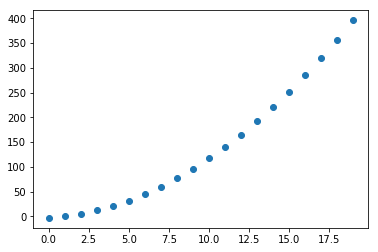

In [2]:
# 定义两个列表变量
x = range(20)
y = [i ** 2 + i * 2 - 3 for i in x]
# 引入matplotlib模块绘图
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

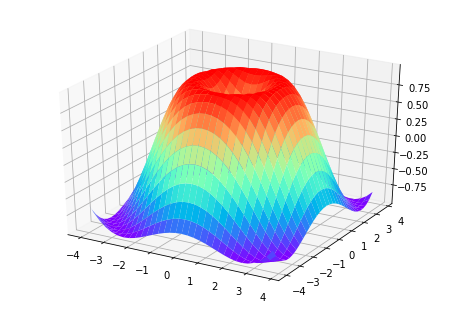

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()


In [3]:
#例1：打印中英文混合信息"Hello World!大家好!"

In [4]:
#例2：计算99999 * 99999并打印结果

In [5]:
#例3：字符串实例，找出相关月份的简称
months="JanFebMarAprMayJunJulAugSepOctNovDec" 
n = 4

> 简洁 + 强制可读性

In [8]:
#例4：计算平均数的函数
def mean(numbers):
   pass

nums = [0,1,2,3,4,5,6,7,8,9]

> 跨平台 + 开源：目前有近10万个开源库，覆盖各类计算问题

In [6]:
#例5：生成随机数
from random import random

### Python语言特点
- Python语言是通用语言  
- Python语言是脚本语言  
- Python语言是开源语言  
- Python语言是跨平台语言  
- Python语言是多模型语言  


## Python开发环境配置
详见课程环境配置的文档

## 程序的基本编写方法（IPO）
- 输入数据  
- 处理数据  
- 输出数据  


### 微实例1.1圆面积的计算
> 输入：圆半径raduis  
> 处理：计算圆面积area = π \* radius \* radius （此处，π取3.1415）  
> 输出：圆面积area   

In [ ]:
#计算圆面积并打印结果，保留两位小数
radius = 25
area = 3.1415 * radius * radius
print(area)
print("{:.2f}".format(area))

### 微实例1.2 简单的人名对话
将用户输入的人名做不同处理（字符串列表，类似数组）
例如：  
输入：郭靖  
输出：  
郭靖同学，学好Python，前途无量！  
郭大侠，学好Python，前途无量！  
靖哥哥，学好Python，前途无量！  

In [ ]:
name = input("输入姓名：")
print("{}同学，学好Python，前途无量！".format(name))
print("{}大侠，学好Python，前途无量！".format(name[0]))
print("{}哥哥，学好Python，前途无量！".format(name[1:]))

### 微实例1.3 斐波拉契数列的计算
根据斐波拉契数列的定义，输出不大于1000的序列元素

In [13]:
#输出不大于1000的斐波拉契数列


### 微实例1.4 同切圆的绘制
绘制4个不同半径的同切圆，利用turtle库

In [14]:
#利用turtle库绘制4个不同半径的同切圆
#import turtle
#turtle.pensize(2)
#turtle.circle(10)
#turtle.circle(40)
#turtle.circle(80)
#turtle.circle(160)

### 微实例1.5 日期和时间的输出
输出当前的日期和时间

In [7]:
#取得当前时间并按相应格式输出
from datetime import datetime
now = datetime.now()
print(now)
print(now.strftime("%x"))
print(now.strftime("%X"))

2017-09-03 09:44:06.189147
09/03/17
09:44:06


## Python语言版本更迭
> Python 2.x版本  
> Python 3.x版本

## 一个爬虫的实例：豆瓣电影TOP250
爬取豆瓣电影250网页的数据

In [4]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'http://movie.douban.com/top250?format=text'
page = requests.get(url)
page.raise_for_status()
page.encoding = page.apparent_encoding
contents = page.text
for i in range(1,10):
    url = 'https://movie.douban.com/top250?start=' + str(i*25) + '&filter='
    page = requests.get(url)
    page.raise_for_status()
    page.encoding = page.apparent_encoding
    contents += page.text
soup = BeautifulSoup(contents, "html.parser")

#电影中文名
names = []
for tag in soup.find_all(attrs={'class':'title'}):
    if not tag.get_text().startswith(u'\xa0/\xa0'):
        names.append(tag.get_text())

#电影评分
scores = []
for tag in soup.find_all(attrs={'class':'rating_num'}):
    scores.append(float(tag.get_text()))

#评价人数
rates = []
for tag in soup.find_all(attrs={'class':'star'}):
    rtag = tag.find_all('span')[-1]
    rates.append(int(rtag.string[:-3]))
print(len(rates))

df = pd.DataFrame({'电影名称':names,'评分':scores,'评价人数':rates})
print(df[:20])


250
         电影名称   评分     评价人数
0      肖申克的救赎  9.6  1108123
1        霸王别姬  9.5   808798
2     这个杀手不太冷  9.4  1027518
3        阿甘正传  9.4   876280
4        美丽人生  9.5   511573
5       泰坦尼克号  9.3   815150
6        千与千寻  9.3   815730
7      辛德勒的名单  9.4   463153
8        盗梦空间  9.3   904303
9      机器人总动员  9.3   596031
10    忠犬八公的故事  9.3   573011
11    三傻大闹宝莱坞  9.2   812934
12      海上钢琴师  9.2   687437
13     放牛班的春天  9.2   550509
14  大话西游之大圣娶亲  9.2   604649
15      楚门的世界  9.1   579654
16         教父  9.2   409569
17         龙猫  9.1   503926
18       星际穿越  9.2   602467
19         熔炉  9.2   334903


## 程序练习题
本章还未开始Python语言语法的介绍，可依据以前学过的编程语言的知识练习编程实例，熟悉编程环境

In [16]:
#习题1 字符串拼接，用户输入两个字符串
#世界这么大，张三想去葡萄牙看看。

In [4]:
#习题2 输入一个数N，求1到N相加后的结果

In [5]:
#习题3 健康食谱的输出，列出5种食材，输出可能的组合